<a href="https://colab.research.google.com/github/ChengAng2001/archivedjupyternotebooks/blob/main/AML_PLOT_k%3D50_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' Import Statements '''
import numpy as np
import pandas as pd
import sklearn
import sys 
import matplotlib.pyplot as plt
import os
from copy import deepcopy

In [ ]:
df=pd.read_csv('/Users/xiaoang/Desktop/creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([<AxesSubplot:title={'center':'V8'}>], dtype=object)

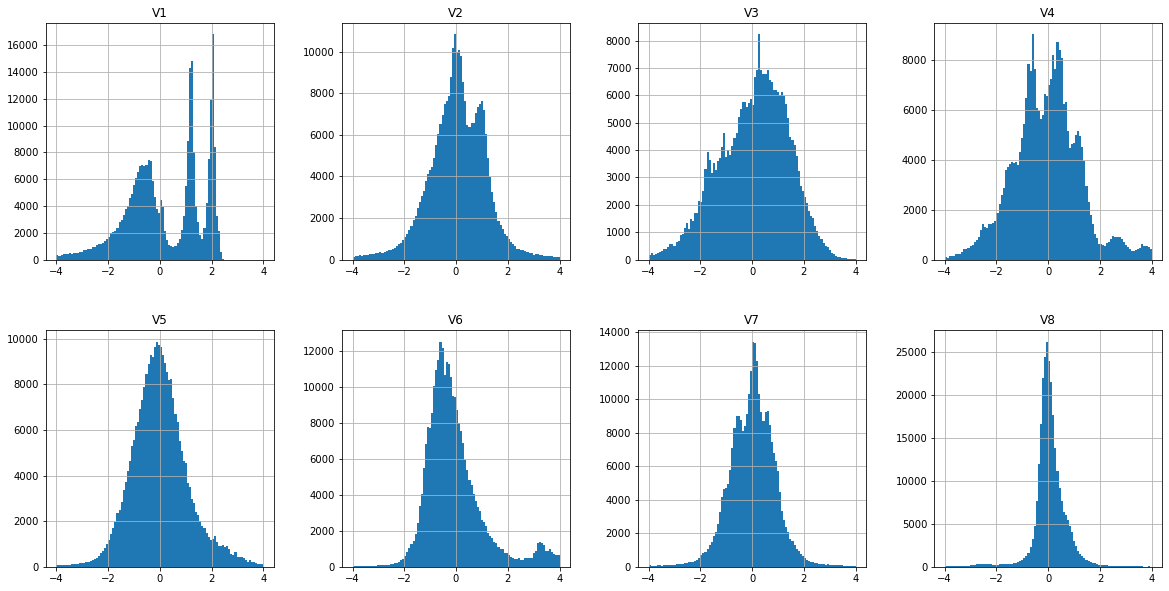

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
df.hist('V1', bins=100, range=(-4,4), ax=axes[0,0])
df.hist('V2', bins=100, range=(-4,4), ax=axes[0,1])
df.hist('V3', bins=100, range=(-4,4), ax=axes[0,2])
df.hist('V4', bins=100, range=(-4,4), ax=axes[0,3])
df.hist('V5', bins=100, range=(-4,4), ax=axes[1,0])
df.hist('V6', bins=100, range=(-4,4), ax=axes[1,1])
df.hist('V7', bins=100, range=(-4,4), ax=axes[1,2])
df.hist('V8', bins=100, range=(-4,4), ax=axes[1,3])

array([<AxesSubplot:title={'center':'V16'}>], dtype=object)

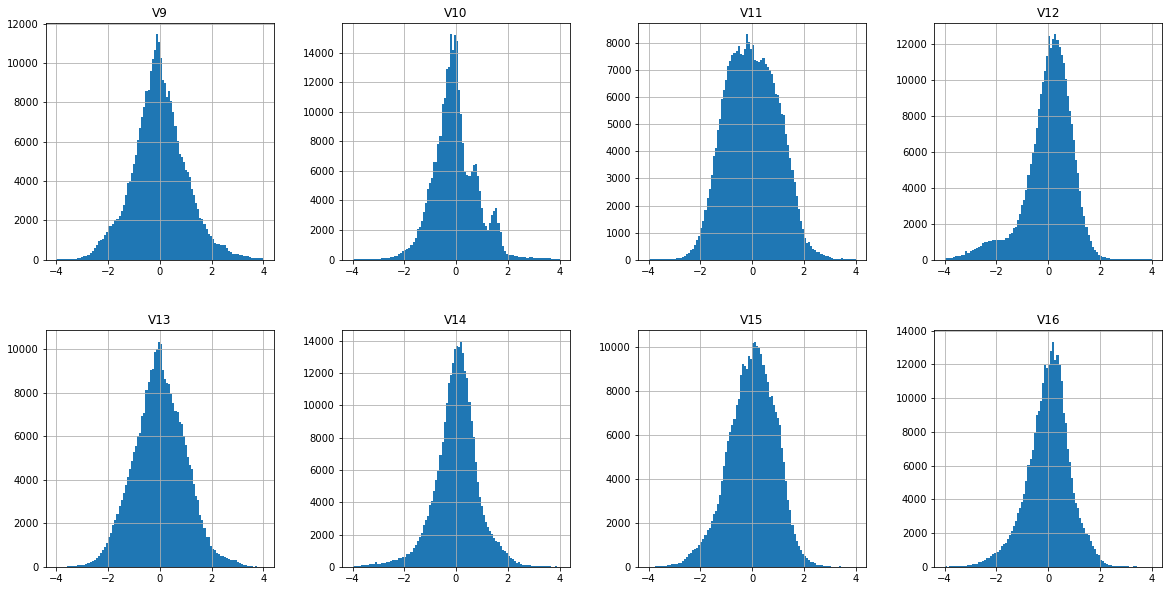

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
df.hist('V9', bins=100, range=(-4,4), ax=axes[0,0])
df.hist('V10', bins=100, range=(-4,4), ax=axes[0,1])
df.hist('V11', bins=100, range=(-4,4), ax=axes[0,2])
df.hist('V12', bins=100, range=(-4,4), ax=axes[0,3])
df.hist('V13', bins=100, range=(-4,4), ax=axes[1,0])
df.hist('V14', bins=100, range=(-4,4), ax=axes[1,1])
df.hist('V15', bins=100, range=(-4,4), ax=axes[1,2])
df.hist('V16', bins=100, range=(-4,4), ax=axes[1,3])

array([<AxesSubplot:title={'center':'V24'}>], dtype=object)

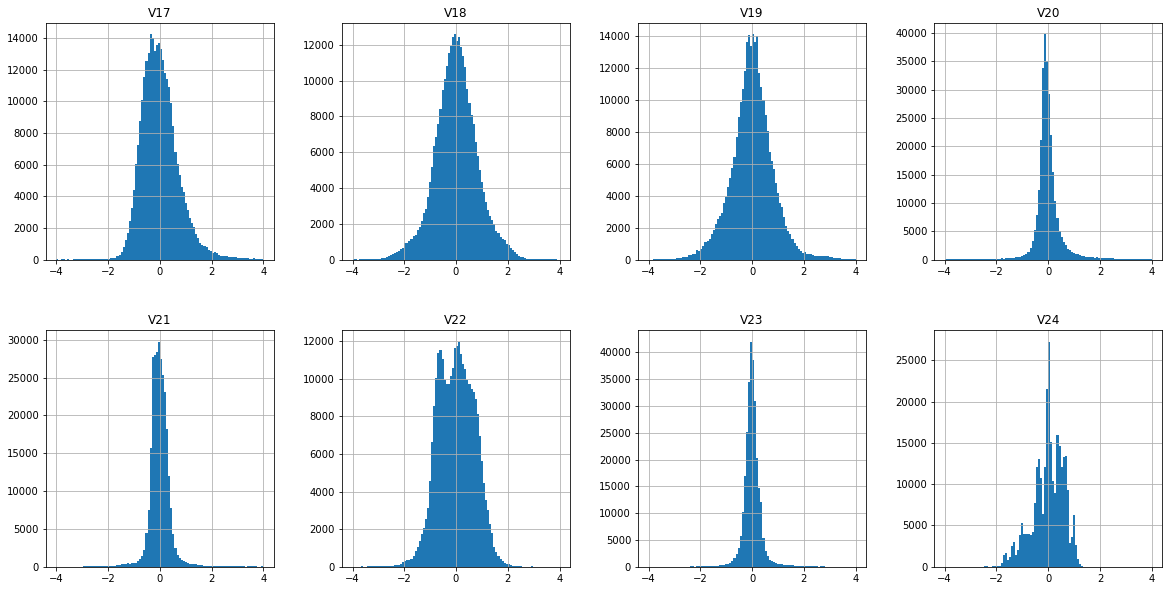

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
df.hist('V17', bins=100, range=(-4,4), ax=axes[0,0])
df.hist('V18', bins=100, range=(-4,4), ax=axes[0,1])
df.hist('V19', bins=100, range=(-4,4), ax=axes[0,2])
df.hist('V20', bins=100, range=(-4,4), ax=axes[0,3])
df.hist('V21', bins=100, range=(-4,4), ax=axes[1,0])
df.hist('V22', bins=100, range=(-4,4), ax=axes[1,1])
df.hist('V23', bins=100, range=(-4,4), ax=axes[1,2])
df.hist('V24', bins=100, range=(-4,4), ax=axes[1,3])

array([<AxesSubplot:title={'center':'Class'}>], dtype=object)

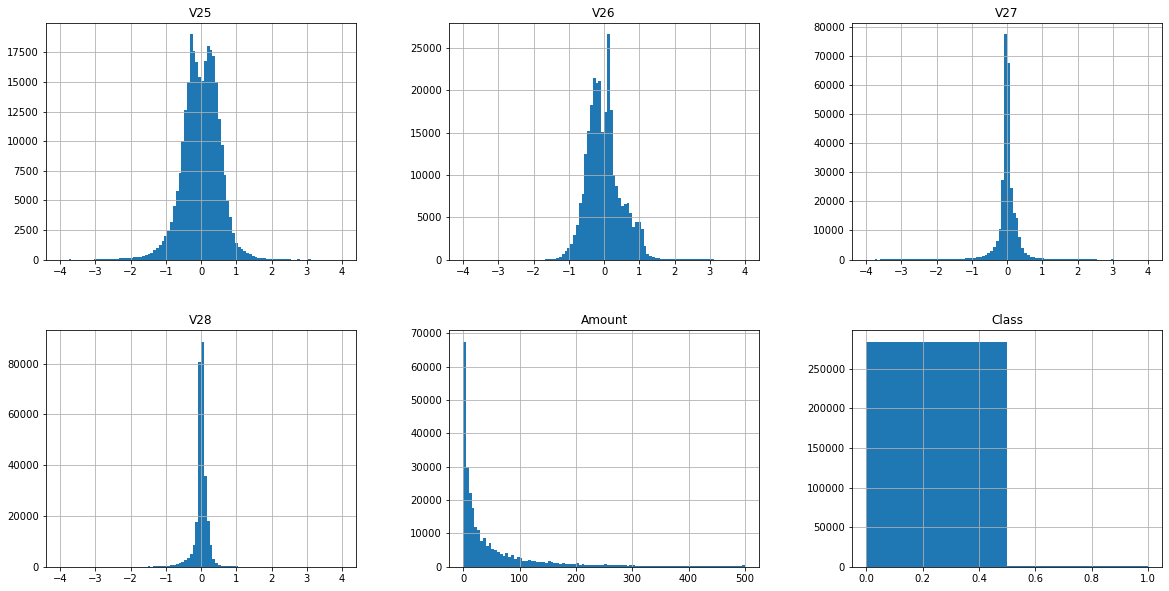

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
df.hist('V25', bins=100, range=(-4,4), ax=axes[0,0])
df.hist('V26', bins=100, range=(-4,4), ax=axes[0,1])
df.hist('V27', bins=100, range=(-4,4), ax=axes[0,2])
df.hist('V28', bins=100, range=(-4,4), ax=axes[1,0])
df.hist('Amount', bins=100, range=(0,500), ax=axes[1,1])
df.hist('Class', bins=2, range=(0,1), ax=axes[1,2])

array([[<AxesSubplot:title={'center':'Time'}>]], dtype=object)

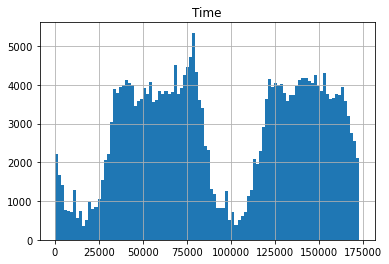

In [ ]:
df.hist('Time', bins=100)

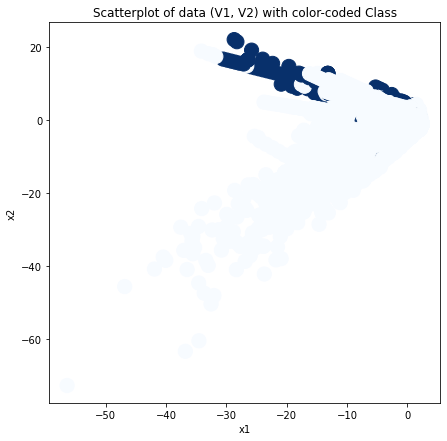

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(df['V1'], df['V2'], s=200, c=df['Class'], cmap='Blues')
plt.title("Scatterplot of data (V1, V2) with color-coded Class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

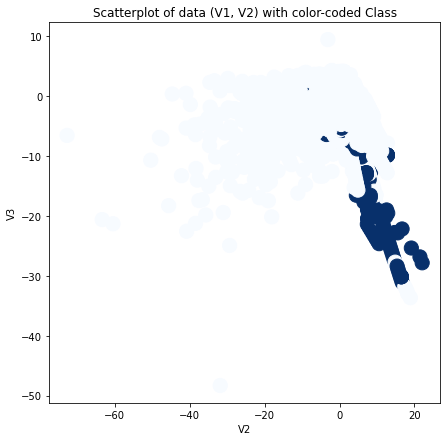

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(df['V2'], df['V3'], s=200, c=df['Class'], cmap='Blues')
plt.title("Scatterplot of data (V1, V2) with color-coded Class")
plt.xlabel("V2")
plt.ylabel("V3")
plt.show()

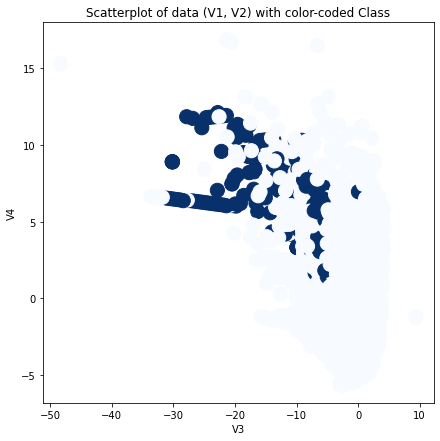

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(df['V3'], df['V4'], s=200, c=df['Class'], cmap='Blues')
plt.title("Scatterplot of data (V1, V2) with color-coded Class")
plt.xlabel("V3")
plt.ylabel("V4")
plt.show()

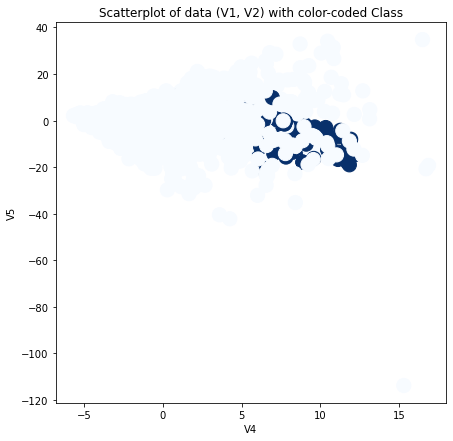

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(df['V4'], df['V5'], s=200, c=df['Class'], cmap='Blues')
plt.title("Scatterplot of data (V1, V2) with color-coded Class")
plt.xlabel("V4")
plt.ylabel("V5")
plt.show()

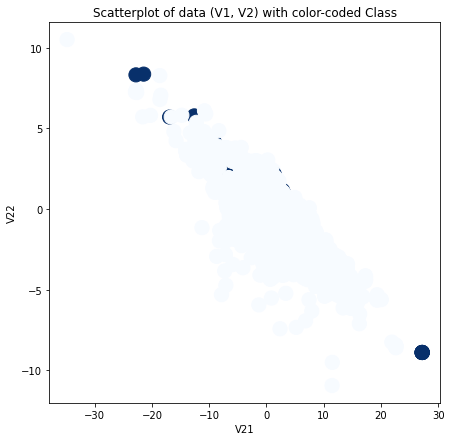

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(df['V21'], df['V22'], s=200, c=df['Class'], cmap='Blues')
plt.title("Scatterplot of data (V1, V2) with color-coded Class")
plt.xlabel("V21")
plt.ylabel("V22")
plt.show()

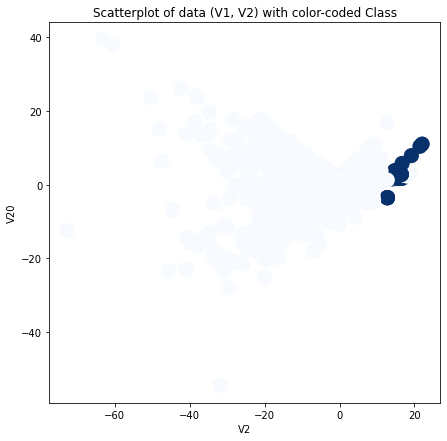

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(df['V2'], df['V20'], s=200, c=df['Class'], cmap='Blues')
plt.title("Scatterplot of data (V1, V2) with color-coded Class")
plt.xlabel("V2")
plt.ylabel("V20")
plt.show()

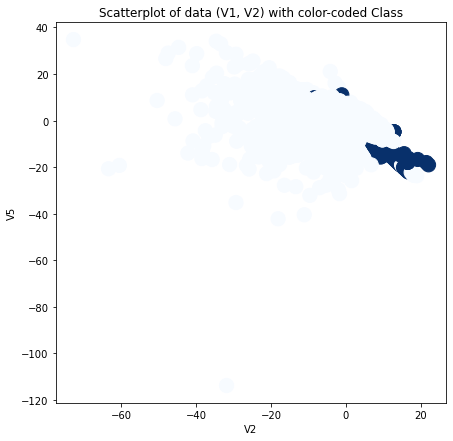

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(df['V2'], df['V5'], s=200, c=df['Class'], cmap='Blues')
plt.title("Scatterplot of data (V1, V2) with color-coded Class")
plt.xlabel("V2")
plt.ylabel("V5")
plt.show()

In [ ]:
# class count
class_count_0, class_count_1 = df['Class'].value_counts()

# Separate class
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 31)
class 1: (492, 31)


In [ ]:
# class count
class_count_0, class_count_1 = df['Class'].value_counts()

# Separate class
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)

print('class 1:', class_1.shape)\

SyntaxError: unexpected EOF while parsing (3843968439.py, line 9)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
mymodel = KMeans(n_clusters=10, random_state=0).fit(class_0)

In [ ]:
def cluster_kmeans(k, x):
  y_pred = KMeans(n_clusters=k, random_state=0)
  return y_pred

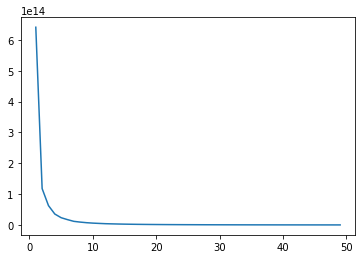

In [ ]:
SSE = []

for k in range(1,50):
  y_pre = KMeans(n_clusters=k, random_state=0).fit(class_0)
  SSE.append(y_pre.inertia_)
X = range(1,50)
plt.plot(X, SSE)
plt.show()

In [ ]:
y_pre.labels_

array([25, 25, 25, ..., 40, 40, 40], dtype=int32)

In [ ]:
y_pre.cluster_centers_

array([[ 1.30119681e+05,  2.48785889e-01, -1.77579122e-01, ...,
         4.88003436e-05,  1.01361221e+02,  0.00000000e+00],
       [ 5.77575902e+04, -3.45216169e-01, -1.61999335e-01, ...,
        -9.83375307e-03,  1.06022262e+02,  0.00000000e+00],
       [ 1.53626478e+05,  3.53766869e-01, -6.29744482e-02, ...,
        -9.53219889e-03,  7.60322658e+01,  0.00000000e+00],
       ...,
       [ 5.45884286e+04, -3.33479588e-01, -1.18319731e-01, ...,
         4.48511090e-04,  1.02152534e+02,  0.00000000e+00],
       [ 3.27602102e+04, -1.46764764e-01, -9.18475107e-02, ...,
        -5.89483058e-03,  9.53075045e+01,  0.00000000e+00],
       [ 9.60675216e+04,  2.81891664e-01,  2.45689934e-01, ...,
         1.36787511e-02,  5.92446794e+01,  0.00000000e+00]])